In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def annual_data(year):
    dev_projs = pd.DataFrame()
    
    for q in range(4, 0, -1):
        new_data = pd.read_csv(f'./data/sf_dev_pipeline/{year}/SF_Development_Pipeline_{year}_Q{q}.csv')
        new_data.columns = new_data.columns.str.lower()
        new_data.columns = new_data.columns.str.replace(' ', '')
        new_data.columns = new_data.columns.str.replace('_', '')
        new_data.columns = new_data.columns.str.replace('/', '')
        if 'affordable' in new_data.columns:
            new_data.rename(columns = {'affordable': 'affordablenet'})
        if 'hotelro1' in new_data.columns:
            new_data.rename(columns = {'hotelro1': 'hotelroomprop'})
        if 'hotelro2' in new_data.columns:
            new_data.rename(columns = {'hotelro2': 'hotelroomnet'})
        if 'hotelroom' in new_data.columns:
            new_data.rename(columns = {'hotelroom': 'hotelroomexist'})
        if 'legalizati' in new_data.columns:
            new_data.rename(columns = {'legalizati': 'legalization'})
        if 'objectid1' in new_data.columns:
            new_data.rename(columns = {'objectid1': 'objectid'})
        if 'pipelineu' in new_data.columns:
            new_data.rename(columns = {'pipelineu': 'pipelineunits'})
        
        if q == 4:
            dev_projs = new_data
        else:
            dev_projs = pd.concat([dev_projs, new_data], sort = False, ignore_index = True)
        
    return dev_projs

In [3]:
dev_projs_2022 = annual_data(2022)

In [4]:
dropped_cols = ['caseno', 
                'bpapplno', 
                'descript', 
                'dbidesc', 
                'planner', 
                'sponsor', 
                'contact', 
                'contactph', 
                'latitude', 
                'longitude', 
                'year', 
                'qtr']

In [5]:
# dev_projs_2022.drop(columns = dropped_cols, inplace = True)

In [6]:
dev_projs_2022

,objectid,landuse,blklot,nameaddr,entitled,beststat,bestdate,units,tcocfcdate,tcocfcunits,...,year,qtr,yearqtr,latlong,neighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods,recreationandparksproperties,sffindneighborhoods
0,1079,Resident,1690032,836 48TH AV,True,CONSTRUCTION,09/20/2021 11:44:06 AM,2.0,NaN,NaN,...,2022.0,Q4,2022_Q4,POINT (-122.5088171 37.7725997),8.0,8.0,4.0,29.0,NaN,NaN
1,7120,Vacant,3778046B,735 BRYANT ST,True,CONSTRUCTION,07/26/2019 12:00:00 AM,0.0,NaN,NaN,...,2022.0,Q4,2022_Q4,POINT (-122.400848374 37.7769458793),32.0,1.0,10.0,34.0,NaN,NaN
2,7477,Resident,4937017,2626 GRIFFITH ST,True,CONSTRUCTION,10/20/2021 11:10:35 AM,1.0,NaN,NaN,...,2022.0,Q4,2022_Q4,POINT (-122.388080214 37.7186214874),88.0,2.0,9.0,1.0,NaN,NaN
3,7841,Resident,6729067,49 SUSSEX ST,True,BP APPROVED,12/13/2019 09:43:07 AM,1.0,NaN,NaN,...,2022.0,Q4,2022_Q4,POINT (-122.433855046 37.7365078557),96.0,9.0,5.0,10.0,NaN,NaN
4,8034,Resident,6706045,1247 BOSWORTH ST,True,BP ISSUED,08/10/2022 12:00:00 AM,1.0,NaN,NaN,...,2022.0,Q4,2022_Q4,POINT (-122.441420855 37.7356345978),72.0,9.0,8.0,41.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8602,6939,Mixres,1511029,566 34TH AV,True,CONSTRUCTION,02/10/2021 12:00:00 AM,2.0,NaN,0.0,...,2022.0,Q1,2022_Q1,POINT (-122.493956996 37.7783676985),8.0,8.0,4.0,29.0,NaN,8.0
8603,9615,Mixres,0131004,1331 GRANT AV,True,PL APPROVED,04/30/2020 12:00:00 AM,4.0,NaN,0.0,...,2022.0,Q1,2022_Q1,POINT (-122.407486294 37.7991763917),106.0,6.0,3.0,23.0,NaN,106.0
8604,10503,Mixed,0541015A,2087 UNION ST,False,PL FILED,11/01/2019 12:00:00 AM,0.0,NaN,0.0,...,2022.0,Q1,2022_Q1,POINT (-122.433617674 37.797134323),15.0,4.0,6.0,13.0,NaN,15.0
8605,11017,Resident,2698014,4414 20TH ST,False,BP Filed,04/02/2021 12:00:00 AM,3.0,NaN,0.0,...,2022.0,Q1,2022_Q1,POINT (-122.437235055 37.7577760397),115.0,3.0,5.0,5.0,NaN,115.0


In [7]:
dev_projs_2022.isnull().sum().sort_values().head(50)

objectid                         0
legalization                     0
adu                              0
entitled                         0
beststat                         0
bestdate                         0
pipelineunits                   11
unitsnet                        14
qtr                             28
yearqtr                         28
year                            28
blklot                          35
pd                              47
nhood41                         50
heightbul                       53
nameaddr                        55
plans                           56
zoning                          59
sud                             68
nhood37                         86
pda                             86
sd22                            87
latitude                       113
latlong                        113
longitude                      113
neighborhoods                  113
currentsupervisordistricts     113
currentpolicedistricts         114
analysisneighborhood

In [14]:
dev_projs_2022['nameaddr'].nunique()

2458

In [15]:
columns_2022 = set(dev_projs_2022.columns)

columns_2022

{'adu',
 'affordablenet',
 'affprojection',
 'afftarget',
 'analysisneighborhoods',
 'bestdate',
 'beststat',
 'blklot',
 'bpapplno',
 'caseno',
 'cie',
 'cieexist',
 'cienet',
 'contact',
 'contactph',
 'currentpolicedistricts',
 'currentsupervisordistricts',
 'da',
 'dbidesc',
 'descript',
 'entitled',
 'heightbul',
 'hotelroomexist',
 'hotelroomnet',
 'hotelroomprop',
 'landuse',
 'latitude',
 'latlong',
 'legalization',
 'longitude',
 'med',
 'medexist',
 'mednet',
 'mips',
 'mipsexist',
 'mipsnet',
 'nameaddr',
 'neighborhoods',
 'netgsf',
 'nhood37',
 'nhood41',
 'objectid',
 'pd',
 'pda',
 'pdr',
 'pdrexist',
 'pdrnet',
 'pipelineunits',
 'planner',
 'plans',
 'qtr',
 'recreationandparksproperties',
 'ret',
 'retexist',
 'retnet',
 'sd22',
 'section415',
 'sffindneighborhoods',
 'sponsor',
 'statedensityall',
 'sud',
 'tcocfcdate',
 'tcocfcunits',
 'tenuretype',
 'totalgsf',
 'units',
 'unitsnet',
 'visit',
 'visitexist',
 'visitnet',
 'year',
 'yearqtr',
 'zoning'}

In [16]:
dev_projs_2021 = annual_data(2021)

In [17]:
dev_projs_2021

,thegeom,landuse,blklot,nameaddr,entitled,beststat,bestdate,units,tcocfcdat,tcocfcuni,...,descript,dbidesc,neighborhoods,sffindneighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods,objectid,tcodate,tcounit
0,POINT (-122.50633085710433 37.74191375759742),Resident,2376024,3734 TARAVAL ST,0,BP FILED,02/28/2017 12:00:00 AM,3,NaN,NaN,...,NaN,ORD 43-14. LEGALIZATION OF GROUND FLOOR UNIT P...,39,39,10.0,7,35.0,NaN,NaN,NaN
1,POINT (-122.43015492543591 37.72260520266989),Resident,6019037,394 NAPLES ST,0,BP Filed,10/15/2020 12:00:00 AM,3,NaN,NaN,...,NaN,LEGALIZATION OF (E) FIRST FLOOR UNIT PER ORDIN...,90,90,9.0,1,7.0,NaN,NaN,NaN
2,POINT (-122.46817285371934 37.77994949193859),Resident,1535034,442 10TH AV,0,BP Filed,10/16/2018 12:00:00 AM,3,NaN,NaN,...,NaN,ADD (N) UNIT @ BASEMENT W/ 2 BEDROOMS AND 1 BA...,5,5,8.0,4,11.0,NaN,NaN,NaN
3,POINT (-122.48612805242004 37.75021781237656),Resident,2106016,2400 PACHECO ST,0,BP Filed,10/14/2020 12:00:00 AM,2,NaN,NaN,...,NaN,Convert existing unfinished ground floor space...,39,39,10.0,7,35.0,NaN,NaN,NaN
4,POINT (-122.43622781117296 37.7888876169925),Resident,0634008,2536 CALIFORNIA ST,0,BP Filed,08/09/2021 12:00:00 AM,1,NaN,NaN,...,The project proposes to demolish the existing ...,"ERECT NEW 4-STORY OVER BASEMENT, TYPE 5B, SING...",102,102,4.0,6,30.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9479,POINT (-122.45252372460567 37.72236013025104),Resident,6946019,76 BRUCE AV,1,CONSTRUCTION,03/02/2020 12:00:00 AM,2,NaN,0.0,...,Front and rear addition. Construct a two story...,THREE STORY REAR ADDITION FOR NEW MASTER BEDRO...,64,64,10.0,1,24.0,101.0,NaN,0.0
9480,POINT (-122.43535125632887 37.77888222436281),Resident,0776001,925 PIERCE ST,1,BP ISSUED,07/14/2020 12:00:00 AM,13,NaN,0.0,...,Addition of an accessory dwelling unit to an e...,ADD UNIT PER ORDINANCE NO. 162-16. CONVERT (E)...,97,97,4.0,11,39.0,1015.0,NaN,0.0
9481,POINT (-122.46669818810463 37.74953476843759),Resident,2130A005F,2081 10TH AV,1,BP ISSUED,09/27/2019 12:00:00 AM,2,NaN,0.0,...,"add new ADU (studio, 540 square feet) at groun...","BUILD NEW ADU ON GROUND FLOOR, REBUILD INTERIO...",44,44,10.0,8,14.0,1418.0,NaN,0.0
9482,POINT (-122.40227606667693 37.71317886434267),Resident,6204005,2 TEDDY AV,1,BP ISSUED,02/08/2021 12:00:00 AM,1,NaN,0.0,...,Construction of one full bathroom on ground fl...,CONVERT PARTIAL GARAGE TO LIVING FOR DAY CARE ...,75,75,9.0,9,40.0,1871.0,NaN,0.0


In [18]:
dev_projs_2021.isnull().sum().sort_values().head(50)

thegeom                         0
mipsnet                         0
pdrexist                        0
retexist                        0
ret                             0
retnet                          0
visit                           0
visitnet                        0
hotelroom                       0
hotelro1                        0
hotelro2                        0
legalizati                      0
adu                             0
year                            0
qtr                             0
yearqtr                         0
pd                              0
zoning                          0
heightbul                       0
latitude                        0
longitude                       0
neighborhoods                   0
sffindneighborhoods             0
currentsupervisordistricts      0
mips                            0
mipsexist                       0
visitexis                       0
med                             0
entitled                        0
beststat      

In [19]:
columns_2021 = set(dev_projs_2021.columns)

In [20]:
set(columns_2022 - columns_2021)

{'affordablenet',
 'affprojection',
 'bpapplno',
 'hotelroomexist',
 'hotelroomnet',
 'hotelroomprop',
 'latlong',
 'legalization',
 'pipelineunits',
 'recreationandparksproperties',
 'sd22',
 'statedensityall',
 'tcocfcdate',
 'tcocfcunits',
 'tenuretype',
 'visitexist'}

In [21]:
set(columns_2021 - columns_2022)

{'affordab1',
 'affordable',
 'hotelro1',
 'hotelro2',
 'hotelroom',
 'legalizati',
 'objectid1',
 'pipelineu',
 'restaura1',
 'restaurant',
 'sd',
 'tcocfcdat',
 'tcocfcuni',
 'tcodate',
 'tcounit',
 'tenuretyp',
 'thegeom',
 'visitexis'}

In [28]:
dev_projs_2021.drop(columns = ['affordab1', 
                               'restaura1', 
                               'restaurant', 
                               'tcocfcdat', 
                               'tcocfcuni', 
                               'thegeom'])

,landuse,blklot,nameaddr,entitled,beststat,bestdate,units,unitsnet,pipelineu,affordable,...,descript,dbidesc,neighborhoods,sffindneighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods,objectid,tcodate,tcounit
0,Resident,2376024,3734 TARAVAL ST,0,BP FILED,02/28/2017 12:00:00 AM,3,1,1,0,...,NaN,ORD 43-14. LEGALIZATION OF GROUND FLOOR UNIT P...,39,39,10.0,7,35.0,NaN,NaN,NaN
1,Resident,6019037,394 NAPLES ST,0,BP Filed,10/15/2020 12:00:00 AM,3,1,1,0,...,NaN,LEGALIZATION OF (E) FIRST FLOOR UNIT PER ORDIN...,90,90,9.0,1,7.0,NaN,NaN,NaN
2,Resident,1535034,442 10TH AV,0,BP Filed,10/16/2018 12:00:00 AM,3,1,1,0,...,NaN,ADD (N) UNIT @ BASEMENT W/ 2 BEDROOMS AND 1 BA...,5,5,8.0,4,11.0,NaN,NaN,NaN
3,Resident,2106016,2400 PACHECO ST,0,BP Filed,10/14/2020 12:00:00 AM,2,1,1,0,...,NaN,Convert existing unfinished ground floor space...,39,39,10.0,7,35.0,NaN,NaN,NaN
4,Resident,0634008,2536 CALIFORNIA ST,0,BP Filed,08/09/2021 12:00:00 AM,1,1,1,0,...,The project proposes to demolish the existing ...,"ERECT NEW 4-STORY OVER BASEMENT, TYPE 5B, SING...",102,102,4.0,6,30.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9479,Resident,6946019,76 BRUCE AV,1,CONSTRUCTION,03/02/2020 12:00:00 AM,2,1,1,0,...,Front and rear addition. Construct a two story...,THREE STORY REAR ADDITION FOR NEW MASTER BEDRO...,64,64,10.0,1,24.0,101.0,NaN,0.0
9480,Resident,0776001,925 PIERCE ST,1,BP ISSUED,07/14/2020 12:00:00 AM,13,1,1,0,...,Addition of an accessory dwelling unit to an e...,ADD UNIT PER ORDINANCE NO. 162-16. CONVERT (E)...,97,97,4.0,11,39.0,1015.0,NaN,0.0
9481,Resident,2130A005F,2081 10TH AV,1,BP ISSUED,09/27/2019 12:00:00 AM,2,1,1,0,...,"add new ADU (studio, 540 square feet) at groun...","BUILD NEW ADU ON GROUND FLOOR, REBUILD INTERIO...",44,44,10.0,8,14.0,1418.0,NaN,0.0
9482,Resident,6204005,2 TEDDY AV,1,BP ISSUED,02/08/2021 12:00:00 AM,1,0,0,0,...,Construction of one full bathroom on ground fl...,CONVERT PARTIAL GARAGE TO LIVING FOR DAY CARE ...,75,75,9.0,9,40.0,1871.0,NaN,0.0


In [22]:
dev_projs_2022['affordablenet'].describe()

count    5985.000000
mean       10.308939
std        90.462559
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3077.000000
Name: affordablenet, dtype: float64

In [23]:
dev_projs_2022['affprojection'].describe()

count     2254
unique     100
top          0
freq      1909
Name: affprojection, dtype: int64

In [24]:
dev_projs_2021['affordab1'].describe()

count    9484.000000
mean        5.465521
std        67.060619
min        -2.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2565.000000
Name: affordab1, dtype: float64

In [25]:
dev_projs_2021['affordable'].describe()

count    9484.000000
mean        6.384437
std        81.120527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3077.000000
Name: affordable, dtype: float64

In [149]:
dev_projs_2020 = annual_data(2020)

In [150]:
columns_2020 = set(dev_projs_2020.columns)

In [151]:
set(columns_2021 - columns_2020)

{'adu',
 'affordab1',
 'hotelro1',
 'hotelro2',
 'hotelroom',
 'legalizati',
 'objectid',
 'objectid1',
 'pipelineu',
 'restaura1',
 'tcocfcdat',
 'tcocfcuni',
 'tcodate',
 'tcounit',
 'tenuretyp',
 'thegeom',
 'visitexis'}

In [152]:
set(columns_2020 - columns_2021)

{'affordablenet',
 'cfctcodate',
 'cfctcounits',
 'heightbulk',
 'hotelroomexist',
 'hotelroomnet',
 'hotelroomprop',
 'location',
 'newgeoreferencedcolumn',
 'pipelineunits',
 'restaurantnet',
 'supname',
 'tenuretype',
 'visitexist'}

In [153]:
set(columns_2022 - columns_2020)

{'adu',
 'affprojection',
 'bpapplno',
 'latlong',
 'legalization',
 'objectid',
 'recreationandparksproperties',
 'sd22',
 'statedensityall',
 'tcocfcdate',
 'tcocfcunits'}

In [154]:
set(columns_2020 - columns_2022)

{'affordable',
 'cfctcodate',
 'cfctcounits',
 'heightbulk',
 'location',
 'newgeoreferencedcolumn',
 'restaurant',
 'restaurantnet',
 'sd',
 'supname'}

In [43]:
dev_projs.drop_duplicates(subset = 'nameaddr', inplace = True)

dev_projs

,objectid,landuse,blklot,nameaddr,entitled,beststat,bestdate,units,tcocfc_date,tcocfc_units,...,supedist,neighborhood,nhood_1990,affordable_net,restaurant_net,plan_area,1990_nhood,planarea,section416,location 1
0,1079.0,Resident,1690032,836 48TH AV,1,CONSTRUCTION,09/20/2021 11:44:06 AM,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7120.0,Vacant,3778046B,735 BRYANT ST,1,CONSTRUCTION,07/26/2019 12:00:00 AM,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7477.0,Resident,4937017,2626 GRIFFITH ST,1,CONSTRUCTION,10/20/2021 11:10:35 AM,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7841.0,Resident,6729067,49 SUSSEX ST,1,BP APPROVED,12/13/2019 09:43:07 AM,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8034.0,Resident,6706045,1247 BOSWORTH ST,1,BP ISSUED,08/10/2022 12:00:00 AM,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43184,NaN,NaN,3538036,81 NOE ST,1,BP APPROVED,10/01/2012 12:00:00 AM,3.0,NaN,NaN,...,8.0,NaN,NaN,NaN,NaN,Market and Octavia; Market Octavia Living Alleys,NaN,NaN,NaN,"(37.7678968336, -122.433131537)"
43188,NaN,NaN,3147030,4534 MISSION ST,0,PL FILED,03/08/2018 12:00:00 AM,4.0,NaN,NaN,...,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(37.7254518373, -122.434584771)"
43194,NaN,NaN,4944018,936 HOLLISTER AVE,0,PL FILED,03/20/2018 12:00:00 AM,1.0,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,Bayview Hunters Point,NaN,NaN,NaN,"(37.7185382776, -122.389810395)"
43198,NaN,NaN,1518001,505 26TH AVE,0,PL FILED,02/01/2018 12:00:00 AM,3.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(37.7797312955, -122.485978127)"


In [48]:
dev_projs.isnull().sum().sort_values(ascending = False).head(50)

recreation and parks properties    4014
tco_date                           4009
section416                         4008
tenure_typ                         4007
tcocfc_dat                         4003
cfctco_units                       3991
cfctco_date                        3991
tcocfc_date                        3967
pda_exist                          3956
planarea                           3946
state density all                  3940
plan_area                          3939
nhood_1990                         3929
pda_proposed                       3926
da                                 3922
aff_target                         3910
point                              3907
pipeline units                     3903
supname                            3903
tenure_type                        3902
location 1                         3895
affordable_net                     3854
restaurant_net                     3854
1990_nhood                         3854
section415                         3852


In [51]:
dev_projs = pd.read_csv('./data/sf_dev_pipeline/2022/SF_Development_Pipeline_2022_Q4.csv')

In [52]:
dev_projs

,ObjectID,LANDUSE,BLKLOT,NAMEADDR,Entitled,BESTSTAT,BESTDATE,UNITS,TCOCFC_DATE,TCOCFC_UNITS,...,Latitude,YEAR,QTR,YEAR_QTR,Lat_Long,Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Recreation and Parks Properties
0,1079,Resident,1690032,836 48TH AV,True,CONSTRUCTION,09/20/2021 11:44:06 AM,2.0,NaN,NaN,...,37.772600,2022,Q4,2022_Q4,POINT (-122.5088171 37.7725997),8.0,8.0,4.0,29.0,NaN
1,7120,Vacant,3778046B,735 BRYANT ST,True,CONSTRUCTION,07/26/2019 12:00:00 AM,0.0,NaN,NaN,...,37.776946,2022,Q4,2022_Q4,POINT (-122.400848374 37.7769458793),32.0,1.0,10.0,34.0,NaN
2,7477,Resident,4937017,2626 GRIFFITH ST,True,CONSTRUCTION,10/20/2021 11:10:35 AM,1.0,NaN,NaN,...,37.718621,2022,Q4,2022_Q4,POINT (-122.388080214 37.7186214874),88.0,2.0,9.0,1.0,NaN
3,7841,Resident,6729067,49 SUSSEX ST,True,BP APPROVED,12/13/2019 09:43:07 AM,1.0,NaN,NaN,...,37.736508,2022,Q4,2022_Q4,POINT (-122.433855046 37.7365078557),96.0,9.0,5.0,10.0,NaN
4,8034,Resident,6706045,1247 BOSWORTH ST,True,BP ISSUED,08/10/2022 12:00:00 AM,1.0,NaN,NaN,...,37.735635,2022,Q4,2022_Q4,POINT (-122.441420855 37.7356345978),72.0,9.0,8.0,41.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,7044,Mixres,0871004,1870 MARKET ST,True,BP ISSUED,02/27/2020 11:49:05 AM,9.0,NaN,NaN,...,37.771261,2022,Q4,2022_Q4,POINT (-122.424672521 37.7712613924),27.0,7.0,5.0,9.0,NaN
2196,10392,Resident,2923024,152 KENSINGTON WY,False,BP FILED,10/18/2019 12:00:00 AM,1.0,NaN,NaN,...,37.742708,2022,Q4,2022_Q4,POINT (-122.461085473 37.7427082948),49.0,10.0,8.0,41.0,NaN
2197,10917,MIPS,3788008,130 TOWNSEND ST,True,PL APPROVED,09/02/2021 12:00:00 AM,0.0,NaN,NaN,...,37.780423,2022,Q4,2022_Q4,POINT (-122.391646184 37.7804227373),31.0,1.0,10.0,8.0,NaN
2198,11433,Resident,4028016,603 SAN BRUNO AV,False,BP FILED,05/23/2022 12:00:00 AM,1.0,NaN,NaN,...,37.761878,2022,Q4,2022_Q4,POINT (-122.404890448 37.7618775427),54.0,2.0,9.0,26.0,NaN


In [53]:
dev_projs.isnull().sum().sort_values()

ObjectID                              0
ADU                                   0
LEGALIZATION                          0
YEAR                                  0
Entitled                              0
                                   ... 
Aff_Projection                     2174
VISIT_EXIST                        2188
TCOCFC_UNITS                       2188
TCOCFC_DATE                        2188
Recreation and Parks Properties    2197
Length: 72, dtype: int64

In [5]:
dev_projs.shape

(1442, 58)

In [6]:
dev_projs.isnull().sum()

PROJECT_TYPE                             0
APN                                      0
NAMEADDR                                 0
PHASE                                 1377
ALIAS                                 1304
ENTITLEMENT                              0
BESTSTAT                                 0
BESTDATE                                 1
UNITS                                    0
NET_UNITS                                0
AFF_UNITS                                0
NET_AFF_UNITS                            0
SECTION415                            1327
TENURE_TYPE                           1347
DA                                    1398
PLN_CASENO                             332
PLN_DESC                               332
BP_APPLNO                              195
BP_DESC                                197
COST                                     0
PROPUSE                                203
TOTAL_GSF                                0
NET_GSF                                  0
CIE        

In [7]:
dev_projs.dtypes

PROJECT_TYPE                           object
APN                                    object
NAMEADDR                               object
PHASE                                  object
ALIAS                                  object
ENTITLEMENT                             int64
BESTSTAT                               object
BESTDATE                               object
UNITS                                   int64
NET_UNITS                               int64
AFF_UNITS                               int64
NET_AFF_UNITS                           int64
SECTION415                             object
TENURE_TYPE                            object
DA                                     object
PLN_CASENO                             object
PLN_DESC                               object
BP_APPLNO                              object
BP_DESC                                object
COST                                  float64
PROPUSE                                object
TOTAL_GSF                         

array([[<Axes: title={'center': 'NET_UNITS'}>]], dtype=object)

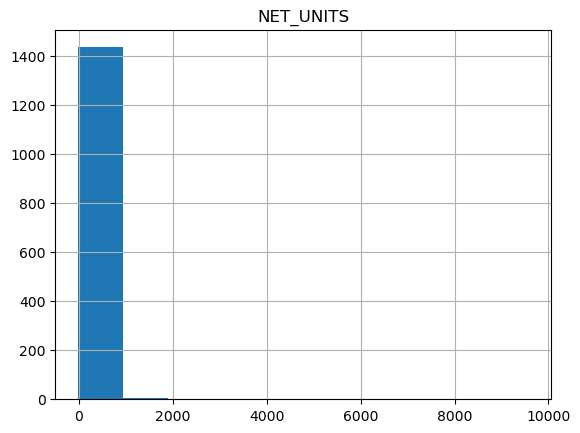

In [8]:
dev_projs.hist('NET_UNITS')

<Axes: >

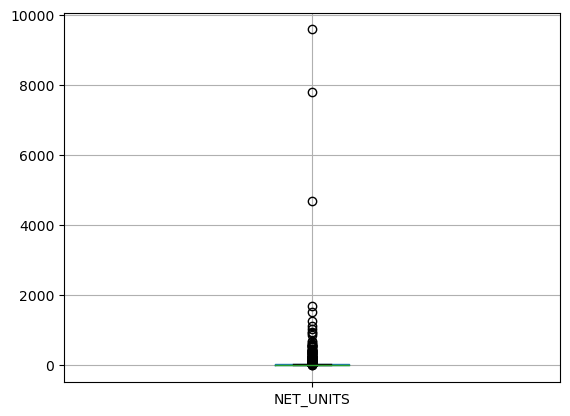

In [11]:
dev_projs.boxplot('NET_UNITS')

<Axes: >

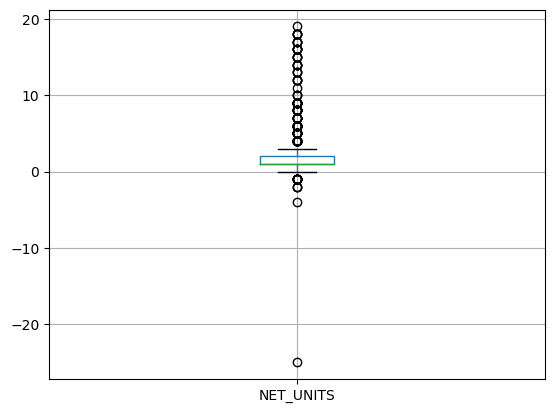

In [15]:
dev_projs[dev_projs['NET_UNITS'] < 20].boxplot('NET_UNITS')

array([[<Axes: title={'center': 'NET_UNITS'}>]], dtype=object)

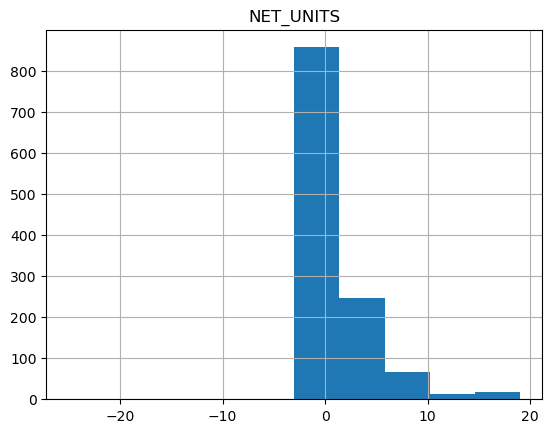

In [16]:
dev_projs[dev_projs['NET_UNITS'] < 20].hist('NET_UNITS')

array([[<Axes: title={'center': 'AFF_UNITS'}>]], dtype=object)

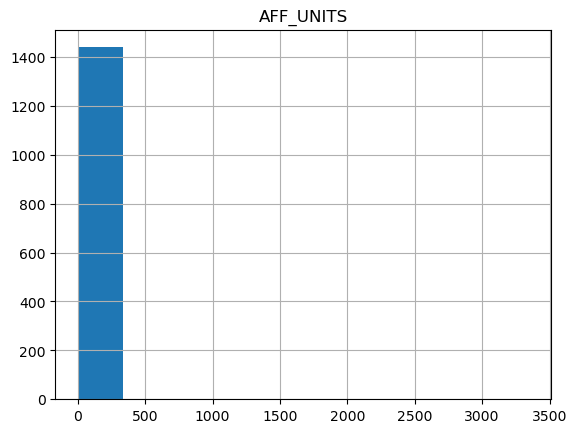

In [17]:
dev_projs.hist('AFF_UNITS')

<Axes: >

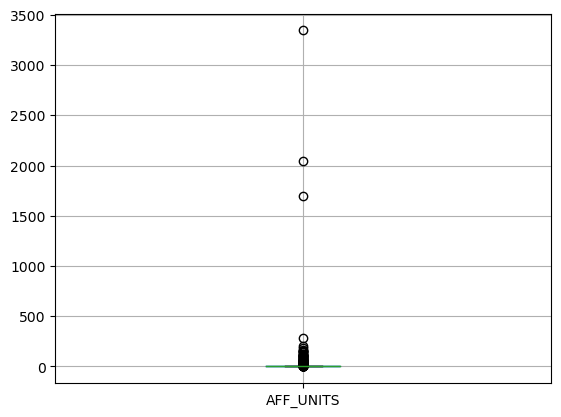

In [18]:
dev_projs.boxplot('AFF_UNITS')

<Axes: >

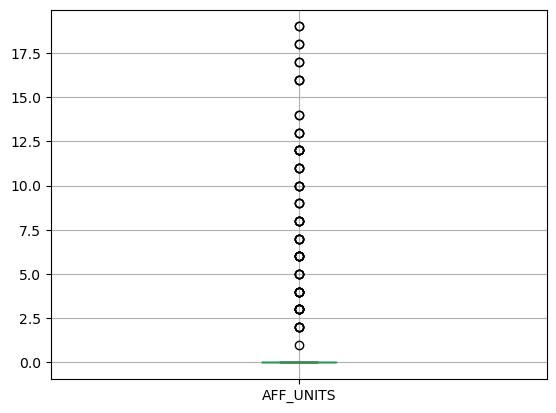

In [20]:
dev_projs[dev_projs['AFF_UNITS'] < 20].boxplot('AFF_UNITS')

array([[<Axes: title={'center': 'AFF_UNITS'}>]], dtype=object)

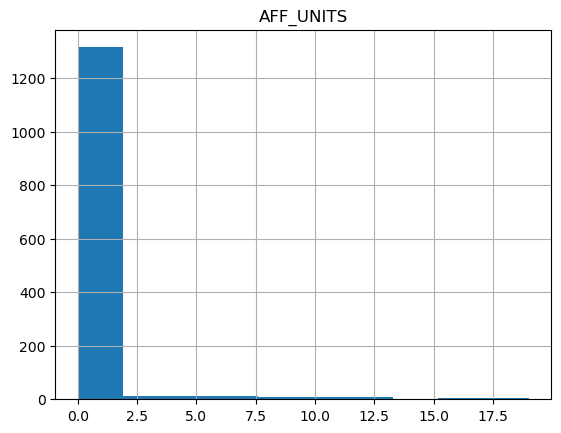

In [21]:
dev_projs[dev_projs['AFF_UNITS'] < 20].hist('AFF_UNITS')

In [24]:
data_dict = pd.read_excel('http://layer.sfplanning.org/PipelineDataDictionary.xlsx')

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>